In [1]:
from itertools import cycle

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Data

In [2]:
np.random.seed(0)
data = datasets.load_digits()
x_data = data.data
y_data = data.target
n_classes = len(np.unique(y_data))

# Binarize the output -> 0 -> [1, 0, 0]
# y_data = label_binarize(y_data, classes=[0, 1, 2])
# n_classes = y_data.shape[1]

# 노이즈 추가
random_state = np.random.RandomState(0)
n_samples, n_features = x_data.shape
x_data = np.c_[x_data, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

print("x_data :", x_data.shape)
print("y_data :", y_data.shape)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test :', x_test.shape)
print('y_test :', y_test.shape)
print('unique labels:', len(np.unique(y_test)))

x_data : (1797, 12864)
y_data : (1797,)
x_train: (898, 12864)
y_train: (898,)
x_test : (899, 12864)
y_test : (899,)
unique labels: 10


# Model

In [3]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=0, n_estimators=2, num_leaves=2, max_depth=1, objective='multiclass')
model.fit(x_train, y_train)

LGBMClassifier(max_depth=1, n_estimators=2, num_leaves=2,
               objective='multiclass', random_state=0)

# Evaluation

In [4]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

print('ACC       :', accuracy_score(y_test, y_pred))
print('Recall    :', recall_score(y_test, y_pred, average='macro'))
print('Precision :', recall_score(y_test, y_pred, average='macro'))

print(classification_report(y_test, y_pred))

ACC       : 0.5461624026696329
Recall    : 0.5647237184305883
Precision : 0.5647237184305883
              precision    recall  f1-score   support

           0       0.70      0.99      0.82        89
           1       0.51      0.58      0.54        90
           2       0.40      0.24      0.30        92
           3       0.50      0.70      0.59        93
           4       0.78      0.67      0.72        76
           5       0.00      0.00      0.00       108
           6       0.39      0.97      0.55        89
           7       0.63      0.82      0.72        78
           8       0.88      0.23      0.36        92
           9       0.55      0.46      0.50        92

    accuracy                           0.55       899
   macro avg       0.53      0.56      0.51       899
weighted avg       0.52      0.55      0.49       899



/home/anderson/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anderson/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anderson/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [5]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

fpr = [None] * n_classes
tpr = [None] * n_classes
roc_auc = [None] * n_classes
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(y_test == i, y_pred == i)

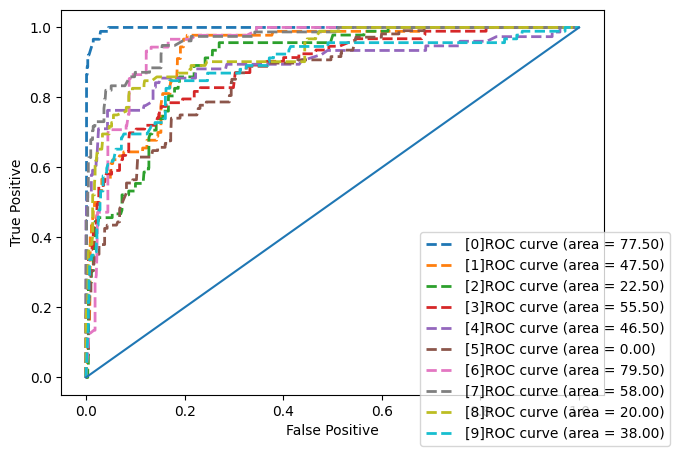

In [6]:
def plot_roc(lw=2):
    idx = 0
    fig, ax = plt.subplots(1, figsize=(7, 5))
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], lw=lw, linestyle="--", label=f"[{i}]ROC curve (area = {roc_auc[i]:.2f})")
    ax.plot([0, 1], [0, 1])
    
    ax.set_ylabel('True Positive')
    ax.set_xlabel('False Positive')
    fig.legend(loc='lower right')
    return fig
    
fig = plot_roc()

## ScikitPlot

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

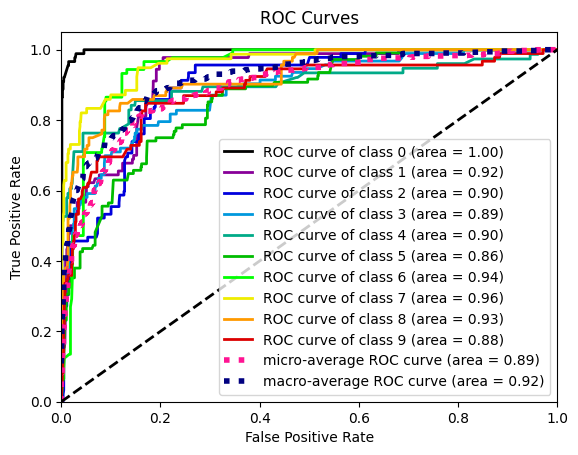

In [8]:
import scikitplot as skplt

y_prob = model.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_prob)